# Analysis of electric bike rental data
#### *TKO_7093 project work*

## Preparing the data

In [277]:
import numpy as np
import pandas as pd

### Loading the data and checking that it is correctly loaded.

In [278]:
bike_data = pd.read_csv('bikes.data', header=0)
bike_data

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,season,0.00,7,TEATTERI,TEATTERI,3,0,0,0.0,0.0
1,single,0.35,7,TORI,TEATTERI,416,820,1,7.5,0.6
2,season,0.00,8,TORI,SATAMA,721,1230,0,0.0,2.1
3,single,0.25,5,TEATTERI,TORI,261,720,0,0.0,1.2
4,season,0.00,5,TEATTERI,TORI,382,710,1,3.3,0.9
...,...,...,...,...,...,...,...,...,...,...
1995,single,0.40,8,KYS,TORI,420,1940,1,10.3,6.0
1996,single,0.65,7,VÄINÖLÄNNIEMI,SATAMA,720,1020,0,0.0,0.0
1997,single,0.15,9,TORI,TEATTERI,172,730,1,6.6,0.3
1998,season,0.00,7,SNELLMANIA,MICROTEKNIA,211,450,0,0.0,0.3


In [279]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ticket            2000 non-null   object 
 1   cost              2000 non-null   float64
 2   month             2000 non-null   int64  
 3   location_from     2000 non-null   object 
 4   location_to       2000 non-null   object 
 5   duration          2000 non-null   int64  
 6   distance          2000 non-null   int64  
 7   assistance        2000 non-null   int64  
 8   energy_used       2000 non-null   float64
 9   energy_collected  2000 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 156.4+ KB


No null values in the data.

### Descriptions of variables.

In [280]:
variable_descriptions = pd.read_csv('bikes_variables.csv', header=0)
variable_descriptions.style

,Variable,Description,Variable type
0,ticket,ticket type,categorical
1,cost,paid fee in euros,quantitative
2,month,calendar month during which the trip was made,categorical
3,location_from,start location of the trip,categorical
4,location_to,end location of the trip,categorical
5,duration,travel time in seconds,quantitative
6,distance,travel distance in meters,quantitative
7,assistance,"status of electric assistance (0 = disabled, 1 = enabled)",categorical
8,energy_used,energy consumed by the bike in watt-hours,quantitative
9,energy_collected,energy collected by the bike in watt-hours,quantitative


Change the data type of categorical variables to 'category'.

In [281]:
categorical = variable_descriptions['Variable'].loc[variable_descriptions['Variable type'] == 'categorical']
bike_data[categorical] = bike_data[categorical].astype('category')
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ticket            2000 non-null   category
 1   cost              2000 non-null   float64 
 2   month             2000 non-null   category
 3   location_from     2000 non-null   category
 4   location_to       2000 non-null   category
 5   duration          2000 non-null   int64   
 6   distance          2000 non-null   int64   
 7   assistance        2000 non-null   category
 8   energy_used       2000 non-null   float64 
 9   energy_collected  2000 non-null   float64 
dtypes: category(5), float64(3), int64(2)
memory usage: 89.4 KB


### Calculating basic statistics for each variable.

In [282]:
bike_data.describe(exclude='category')

,cost,duration,distance,energy_used,energy_collected
count,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,0.22345,539.975500,1721.93000,11.761300,4.389300
std,0.47570,593.810888,2017.79918,15.573439,5.990604
min,0.00000,1.000000,-3320.00000,0.000000,0.000000
25%,0.00000,144.750000,40.00000,0.000000,0.000000
50%,0.00000,400.000000,1130.00000,7.100000,2.400000
75%,0.30000,736.750000,2572.50000,18.500000,6.900000
max,6.95000,8292.000000,19740.00000,184.300000,91.500000


Convert negative values to positive.

In [283]:
bike_data['distance'] = bike_data['distance'].apply(lambda x: np.abs(x))
bike_data.describe()

,cost,duration,distance,energy_used,energy_collected
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.22345,539.975500,1726.960000,11.761300,4.389300
std,0.47570,593.810888,2013.493714,15.573439,5.990604
min,0.00000,1.000000,0.000000,0.000000,0.000000
25%,0.00000,144.750000,50.000000,0.000000,0.000000
50%,0.00000,400.000000,1130.000000,7.100000,2.400000
75%,0.30000,736.750000,2580.000000,18.500000,6.900000
max,6.95000,8292.000000,19740.000000,184.300000,91.500000


In [284]:
bike_data.describe(include='category')

,ticket,month,location_from,location_to,assistance
count,2000,2000,2000,2000,2000
unique,3,7,10,10,2
top,season,6,TORI,TORI,1
freq,893,488,673,756,1633


### Visualising the distribution of quantitative variables.

Check ticket costs for each type.

In [285]:
bike_data.groupby('ticket')['cost'].sum()

ticket
savonia      0.0
season       8.0
single     438.9
Name: cost, dtype: float64

In [286]:
bike_data.loc[bike_data['ticket'] == 'season'].loc[bike_data['cost'] == 1]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
119,season,1.0,7,VÄINÖLÄNNIEMI,MICROTEKNIA,2232,6520,1,62.0,10.2
296,season,1.0,7,UIMAHALLI,RYPYSUO,2946,6000,1,47.8,15.9
741,season,1.0,5,TORI,TORI,2851,3920,0,0.0,9.0
785,season,1.0,8,VÄINÖLÄNNIEMI,VÄINÖLÄNNIEMI,2286,4370,1,31.7,12.0
1091,season,1.0,6,MICROTEKNIA,PETONEN,2014,6810,0,0.0,13.5
1323,season,1.0,8,TORI,SATAMA,1856,2770,1,22.4,7.5
1469,season,1.0,6,VÄINÖLÄNNIEMI,VÄINÖLÄNNIEMI,2422,7110,1,36.0,9.9
1630,season,1.0,7,VÄINÖLÄNNIEMI,VÄINÖLÄNNIEMI,3268,8940,1,80.6,21.9


Only single tickets have a cost. The cost on seasonal tickets is assumed to be an extra cost for long distance trips.

Text(0.5, 1.0, 'Single ticket costs')

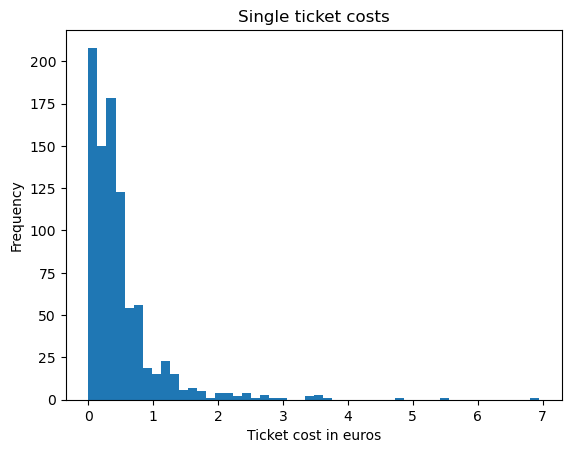

In [287]:
ax_cost = bike_data.loc[bike_data['ticket'] == 'single'].plot.hist(column='cost', bins=50, range=(0,bike_data['cost'].max()), legend=False)
# Set xlabel to the ax because it did not work as an argument to hist()
ax_cost.set_xlabel('Ticket cost in euros')
ax_cost.set_title('Single ticket costs')


Text(0.5, 1.0, 'Rental duration')

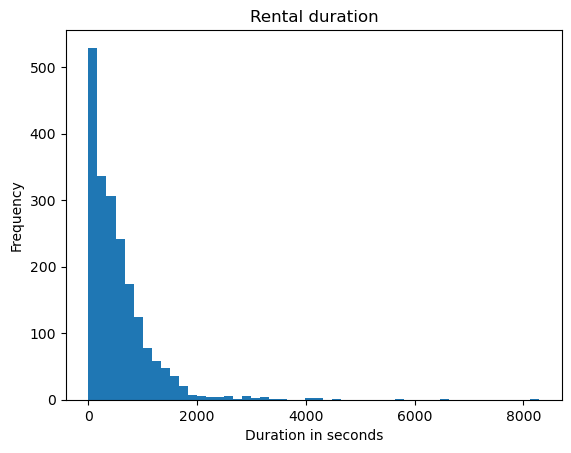

In [288]:
ax_duration = bike_data.plot.hist(column='duration', bins=50, range=(0,bike_data['duration'].max()), legend=False)
ax_duration.set_xlabel('Duration in seconds')
ax_duration.set_title('Rental duration')

Text(0.5, 1.0, 'Travel distance')

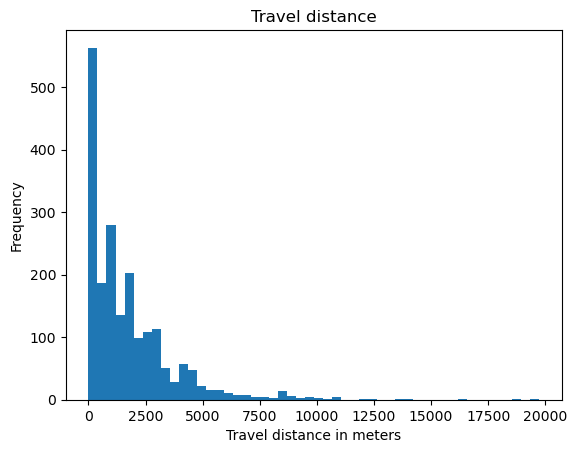

In [289]:
ax_distance = bike_data.plot.hist(column='distance', bins=50, range=(0,bike_data['distance'].max()), legend=False)
ax_distance.set_xlabel('Travel distance in meters')
ax_distance.set_title('Travel distance')

Energy used is considered only when assistance was used.

<AxesSubplot:title={'center':'Energy used when assistance was used'}, xlabel='Energy used in watt-hours', ylabel='Frequency'>

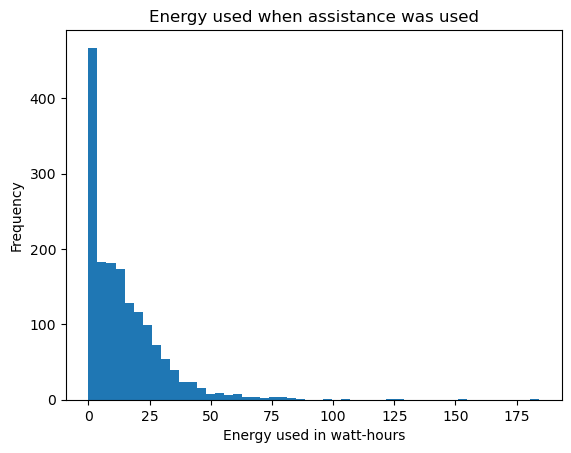

In [290]:
ax_energy_used = bike_data.loc[bike_data['assistance'] == 1].plot.hist(column='energy_used', bins=50, range=(0,bike_data['energy_used'].max()), legend=False)
ax_energy_used.set_xlabel('Energy used in watt-hours')
ax_energy_used.set_title('Energy used when assistance was used')
ax_energy_used

<AxesSubplot:title={'center':'Energy collected'}, xlabel='Energy collected in watt-hours', ylabel='Frequency'>

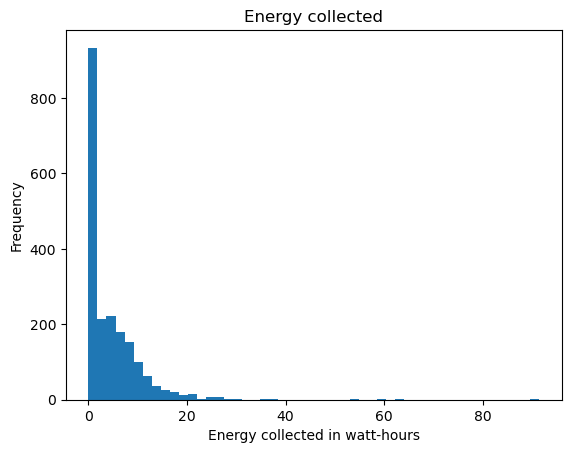

In [291]:
ax_energy_collected = bike_data.plot.hist(column='energy_collected', bins=50, range=(0,bike_data['energy_collected'].max()), legend=False)
ax_energy_collected.set_xlabel('Energy collected in watt-hours')
ax_energy_collected.set_title('Energy collected')
ax_energy_collected

### Visualising the distribution of categorical variables.

<AxesSubplot:title={'center':'Ticket counts'}>

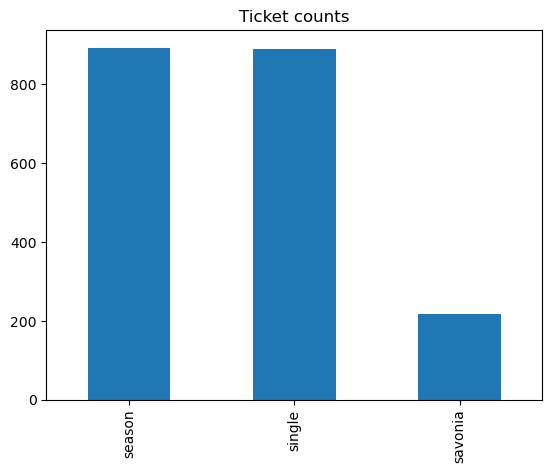

In [292]:
bike_data['ticket'].value_counts().plot.bar(title='Ticket counts')

<AxesSubplot:title={'center':'Monthly rentals'}>

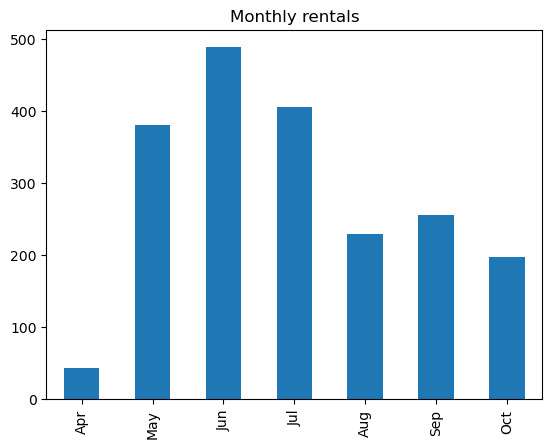

In [293]:
import calendar
bike_data_month = bike_data['month'].apply(lambda x: calendar.month_abbr[x])
bike_data_month.value_counts(sort=False).plot.bar(title='Monthly rentals')

<AxesSubplot:title={'center':'Rental start location'}>

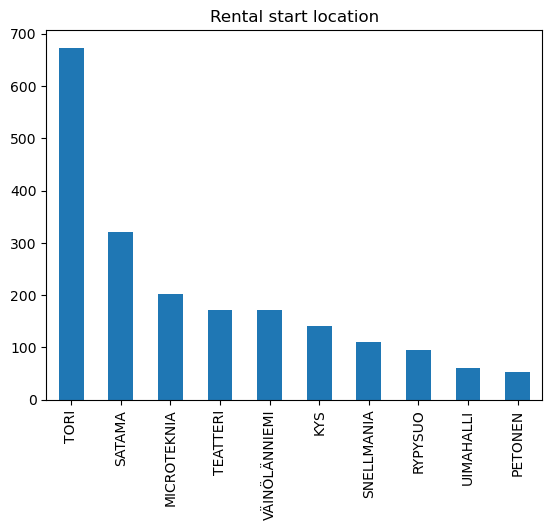

In [294]:
bike_data['location_from'].value_counts().plot.bar(title='Rental start location')

<AxesSubplot:title={'center':'Rental end location'}>

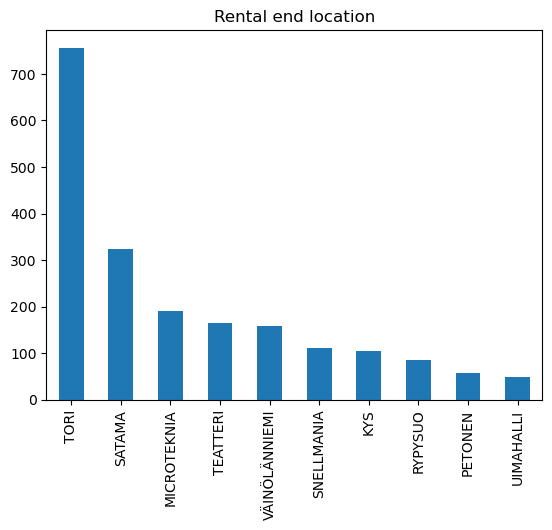

In [295]:
bike_data['location_to'].value_counts().plot.bar(title='Rental end location')

<AxesSubplot:title={'center':'Assistance used'}>

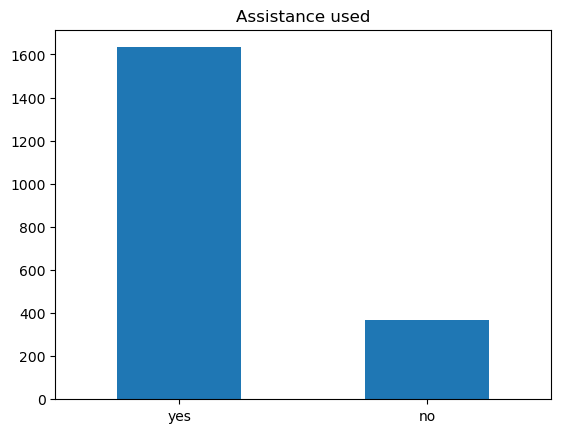

In [304]:
ax_assistance = bike_data['assistance'].value_counts().plot.bar(title='Assistance used')
ax_assistance.set_xticklabels(['yes', 'no'], rotation=0)
ax_assistance

## Data exploration

### Calculating the total distance travelled, the total time travelled, and the total amount of fees paid per ticket type.

In [320]:
bike_data.groupby('ticket')[['distance', 'duration', 'cost']].sum()

,distance,duration,cost
ticket,,,
savonia,408590,122618,0.0
season,1419250,459643,8.0
single,1626080,497690,438.9


Takng a closer look in season ticket costs.

In [300]:
bike_data.loc[bike_data['ticket'] == 'season'].loc[bike_data['cost'] == 1]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
119,season,1.0,7,VÄINÖLÄNNIEMI,MICROTEKNIA,2232,6520,1,62.0,10.2
296,season,1.0,7,UIMAHALLI,RYPYSUO,2946,6000,1,47.8,15.9
741,season,1.0,5,TORI,TORI,2851,3920,0,0.0,9.0
785,season,1.0,8,VÄINÖLÄNNIEMI,VÄINÖLÄNNIEMI,2286,4370,1,31.7,12.0
1091,season,1.0,6,MICROTEKNIA,PETONEN,2014,6810,0,0.0,13.5
1323,season,1.0,8,TORI,SATAMA,1856,2770,1,22.4,7.5
1469,season,1.0,6,VÄINÖLÄNNIEMI,VÄINÖLÄNNIEMI,2422,7110,1,36.0,9.9
1630,season,1.0,7,VÄINÖLÄNNIEMI,VÄINÖLÄNNIEMI,3268,8940,1,80.6,21.9


Only single tickets have a cost. The cost on seasonal tickets is assumed to be an extra cost for long distance trips.

### Calculating the mean distance travelled, the mean energy consumed, and the mean energy collected per status of assistance.

In [321]:
grouped_assistance = bike_data.groupby('assistance')[['distance', 'energy_used', 'energy_collected']].mean()
grouped_assistance = grouped_assistance.rename(index={0: 'no', 1:'yes'})
grouped_assistance

,distance,energy_used,energy_collected
assistance,,,
no,873.542234,0.000000,1.661853
yes,1918.756889,14.404532,5.002266
